In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy

import glob
import os

In [13]:
All_Data=pd.DataFrame()

for i in range(4,18):
    file_number=str(i).zfill(3)
    file_name="../results/anchor_area_csv/Anchor_area_2021nov14_8ml_kb_wt_140X_2sec3min-{}_under_surface.csv".format(file_number)
    #print(file_name)
    
    Data=pd.read_csv(file_name)
    Data["series_time"]=i
    All_Data=pd.concat([All_Data,Data])


## Number Objects
Number detected object grows with time. As a result of growing number of small moving objects.

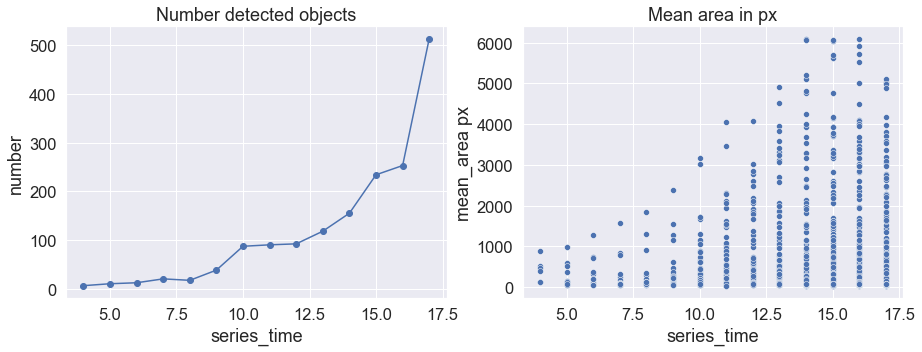

In [14]:
import seaborn as sns
sns.set(font_scale=1.5)
fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(15,5))
ax[0].plot(All_Data.groupby("series_time").count()["particle"],'-o')
ax[0].set_xlabel("series_time")
ax[0].set_ylabel("number")
ax[0].set_title("Number detected objects")

sns.scatterplot(data=All_Data,x="series_time",y="mean_area",ax=ax[1])
ax[1].set_ylabel("mean_area px")
ax[1].set_title("Mean area in px");
plt.savefig("../results/"+"DataSet_8Aug21"+"_number_detected_objects.png")

## Explore categories

In [16]:
Df=[]
for id,group in All_Data.groupby("series_time"):
    df=group["type"].value_counts()
    df['series_time']=id
    if "rotating" in df.index:
        df['total']=df["fixed"]+df["rotating"]+df["moving"]
    else:
        df['total']=df["fixed"]+df["moving"]
        df["rotating"]=0
        
    Df.append(df)
    
    
    
Df=pd.DataFrame(Df)
Df["fixed_percent"]=Df["fixed"]/Df["total"]
Df["rotating_percent"]=Df["rotating"]/Df["total"]
Df["moving_percent"]=Df["moving"]/Df["total"]

Df=Df.set_index("series_time")

<Figure size 1440x720 with 0 Axes>

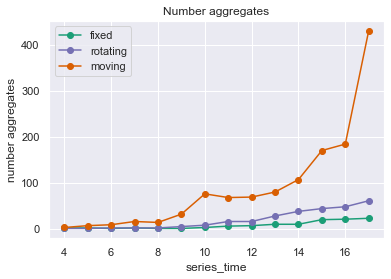

In [17]:
sns.set()
plt.figure(figsize=(20,10))
Df[['fixed','rotating','moving']].plot(kind='line',style="-o",color=["#1b9e77","#7570b3","#d95f02"])
plt.ylabel("number aggregates");
plt.title("Number aggregates")
plt.savefig("../results/number_type_aggregates.png",bbox_inches="tight")

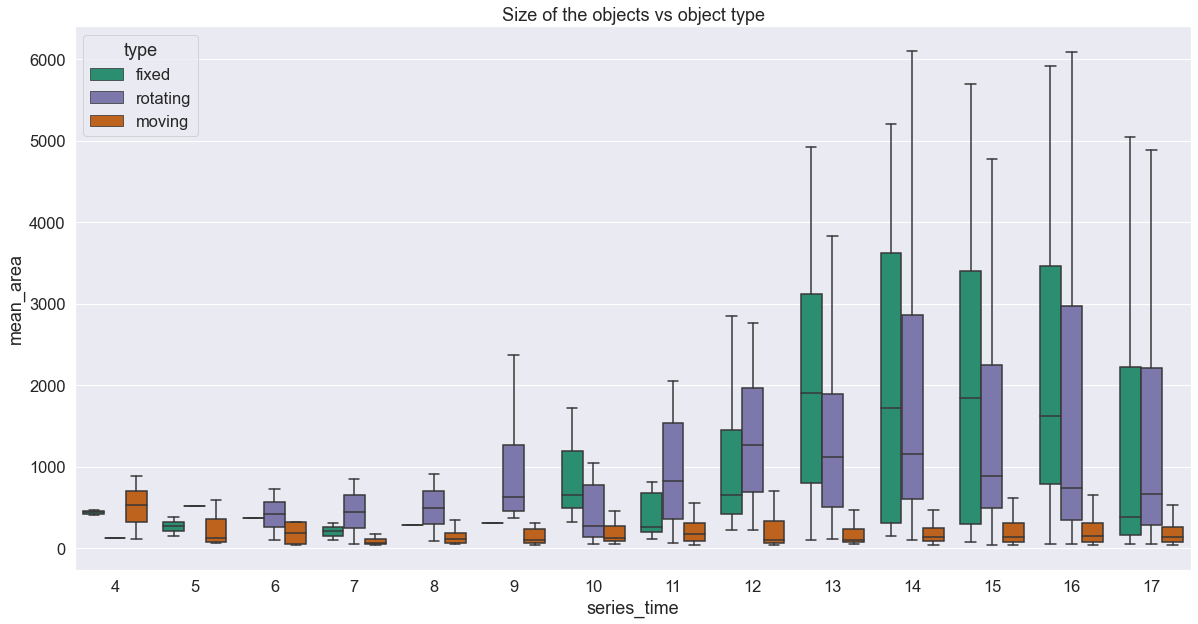

In [18]:
sns.set(font_scale=1.5)
fig,ax=plt.subplots(nrows=1,ncols=1,figsize=(20,10))
palette_new=["#1b9e77","#7570b3","#d95f02"]
sns.boxplot(data=All_Data,x="series_time",y="mean_area",hue="type", hue_order=["fixed","rotating","moving"],palette=palette_new,ax=ax,showfliers = False)
ax.set_title("Size of the objects vs object type")
plt.savefig("../results/object_classes_size.png",bbox_inches="tight")